In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
results = pd.read_csv('../Results/results.csv')
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score
0,Aus_weather,Aus_weather_1,Brak,Brak przygotowania,0.855405,0.849324,0.836486
1,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie średnią,0.829787,0.820669,0.820669
2,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie minimum,0.834650,0.819453,0.815805
3,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.834043,0.820669,0.813374
4,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie regresją,0.830395,0.820669,0.822492
...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.677778
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.811111
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.578947
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000


In [25]:
results['average_score'] = sum([results['xgb_score'],results['rfc_score'],results['knn_score']])/3
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score
0,Aus_weather,Aus_weather_1,Brak,Brak przygotowania,0.855405,0.849324,0.836486,0.847072
1,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie średnią,0.829787,0.820669,0.820669,0.823708
2,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie minimum,0.834650,0.819453,0.815805,0.823303
3,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.834043,0.820669,0.813374,0.822695
4,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie regresją,0.830395,0.820669,0.822492,0.824519
...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.677778,0.892593
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.811111,0.937037
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.578947,0.859649
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000


In [26]:
results['std_err'] = sum([pow(results['xgb_score'] - results['average_score'],2) ,pow(results['rfc_score'] - results['average_score'],2),pow(results['knn_score'] - results['average_score'],2)])/3
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,std_err
0,Aus_weather,Aus_weather_1,Brak,Brak przygotowania,0.855405,0.849324,0.836486,0.847072,0.000062
1,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie średnią,0.829787,0.820669,0.820669,0.823708,0.000018
2,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie minimum,0.834650,0.819453,0.815805,0.823303,0.000067
3,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.834043,0.820669,0.813374,0.822695,0.000073
4,Aus_weather,Aus_weather_1,Wypełnienie_brakujących,Wypełnienie regresją,0.830395,0.820669,0.822492,0.824519,0.000018
...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.677778,0.892593,0.023073
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.811111,0.937037,0.007929
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.578947,0.859649,0.039397
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.020000


In [27]:
results['scenario'].unique()

array(['Brak przygotowania', 'Wypełnienie średnią', 'Wypełnienie minimum',
       'Wypełnienie maksimum', 'Wypełnienie regresją', 'Standaryzacja',
       'Skalowanie do (0-1)', 'Skalowanie (0-1) + usuw. odstających',
       'Kodowanie wartości kategorycznych',
       'Kod. war. kategorycznych + wyp. brak. średnią',
       'Custom preprocessing'], dtype=object)

In [28]:
results['dataset'].unique()

array(['Aus_weather_1', 'Aus_weather_2', 'Aus_weather_3', 'LoL_Stats_1',
       'LoL_Stats_2', 'LoL_Stats_3', 'Titanic_1', 'Titanic_2',
       'Titanic_3'], dtype=object)

In [29]:
results['group'].unique()

array(['Brak', 'Wypełnienie_brakujących', 'Standaryzacja', 'Kodowanie',
       'Custom'], dtype=object)

In [30]:
def get_dataset_results(dataset):
    data_res = results.loc[results['dataset'] == dataset]
    return data_res

In [31]:
def get_group_results(dataset,group):
    data_res = dataset.loc[dataset['group'] == "Brak"] 
    data_res = data_res.append(dataset.loc[dataset['group'] == group])
    return data_res

In [32]:
titanic_1 = get_dataset_results('Titanic_1')
titanic_2 = get_dataset_results('Titanic_2')
titanic_3 = get_dataset_results('Titanic_3')

In [33]:
aus_weather_1 = get_dataset_results('Aus_weather_1')
aus_weather_2 = get_dataset_results('Aus_weather_2')
aus_weather_3 = get_dataset_results('Aus_weather_3')

In [34]:
lol_stats_1 = get_dataset_results('LoL_Stats_1')
lol_stats_2 = get_dataset_results('LoL_Stats_2')
lol_stats_3 = get_dataset_results('LoL_Stats_3')

In [35]:
def plot_dataset(dataset, title, filename):
    x1 = dataset['scenario'].unique()
    y1 = dataset['xgb_score']
    y2 = dataset['rfc_score']
    y3 = dataset['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label = 'xgb_score', marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label = 'rfc_score', marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label = 'knn_score', marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [36]:
def plot_average(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['average_score']
    y2 = dataset_2['average_score']
    y3 = dataset_3['average_score']
    e1 = dataset_1['std_err']
    e2 = dataset_2['std_err']
    e3 = dataset_3['std_err']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.errorbar(x1,y1,e1,linestyle='None', color='blue',  label = dataset_1['dataset'].unique()[0], marker='o')
    plt.errorbar(x1,y2,e2,linestyle='None', color='red',  label = dataset_2['dataset'].unique()[0], marker='x')
    plt.errorbar(x1,y3,e3,linestyle='None', color='green',  label = dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [37]:
def plot_xgb_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['xgb_score']
    y2 = dataset_2['xgb_score']
    y3 = dataset_3['xgb_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_2['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [38]:
def plot_rfc_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['rfc_score']
    y2 = dataset_2['rfc_score']
    y3 = dataset_3['rfc_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_2['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [39]:
def plot_knn_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['knn_score']
    y2 = dataset_2['knn_score']
    y3 = dataset_3['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])


C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

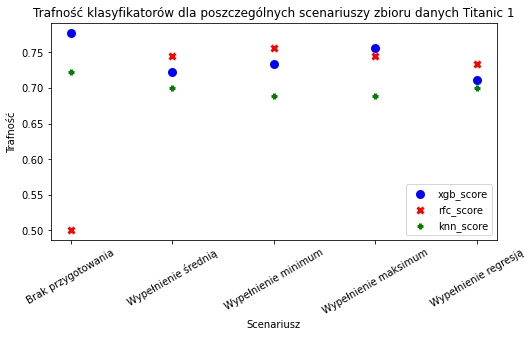

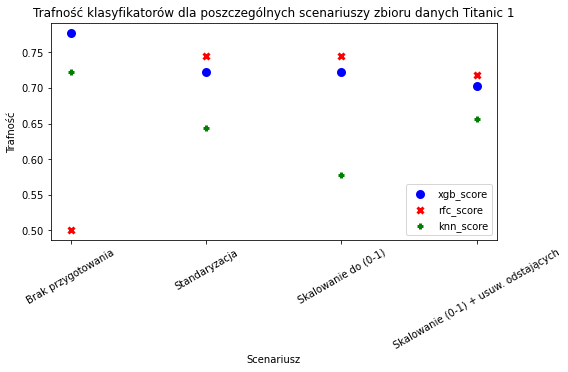

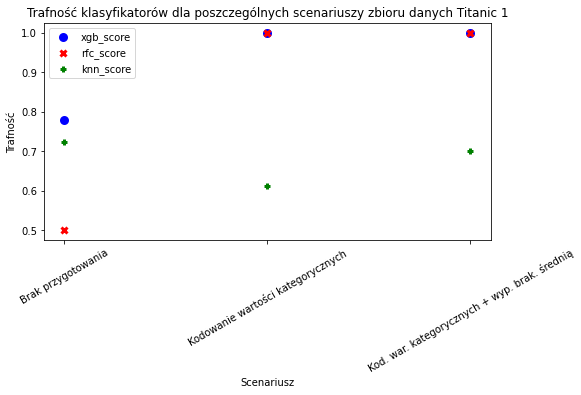

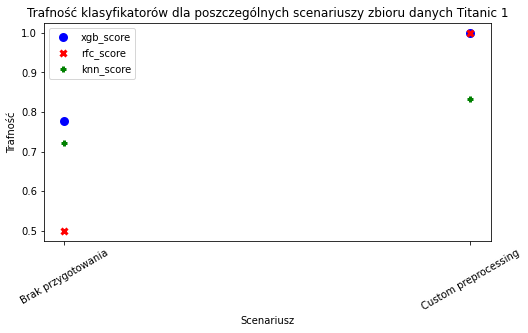

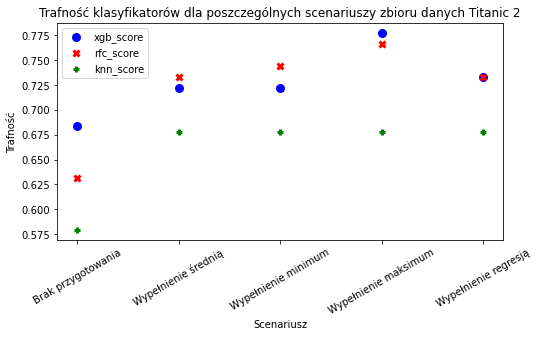

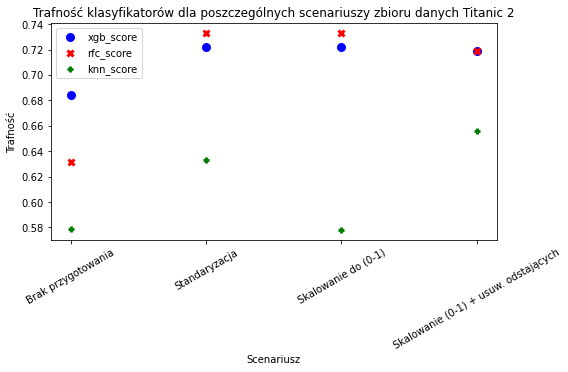

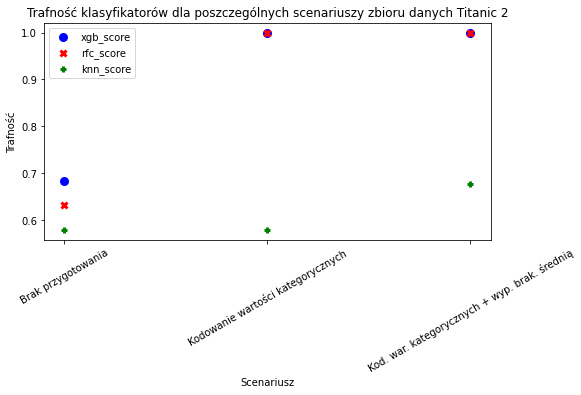

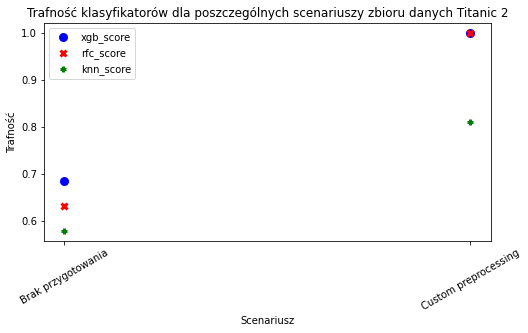

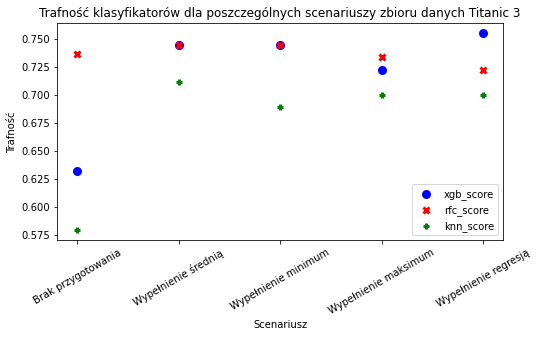

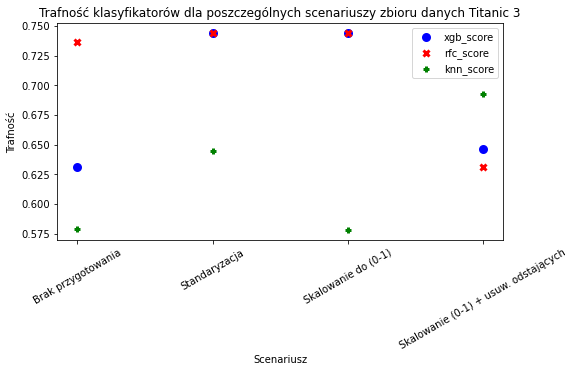

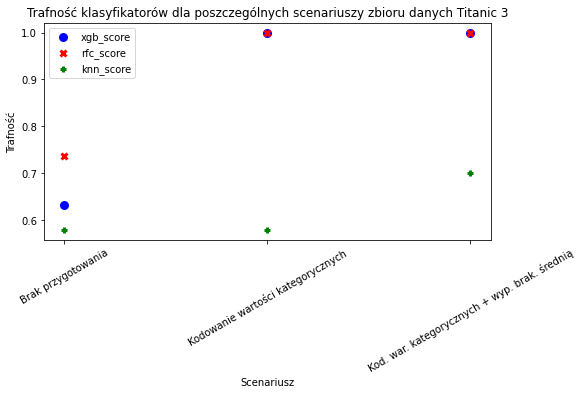

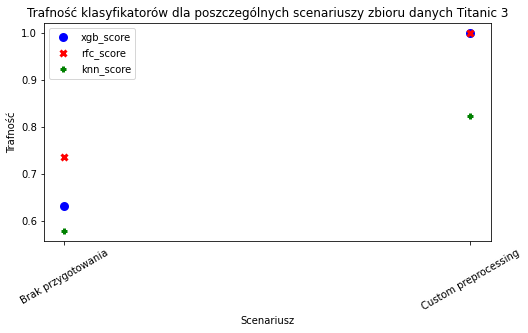

In [40]:
i = 1 
for dataset in [titanic_1,titanic_2,titanic_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Titanic " + str(i),
                                 "Titanic_" + str(i) + "_" + group)
    i = i + 1


C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

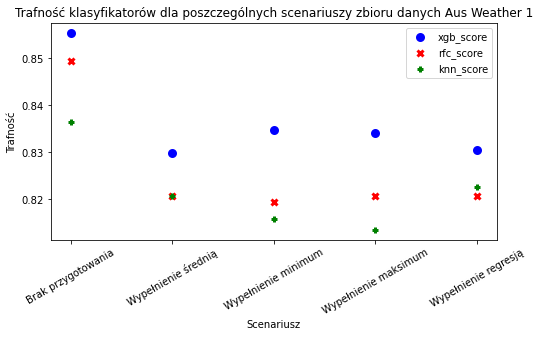

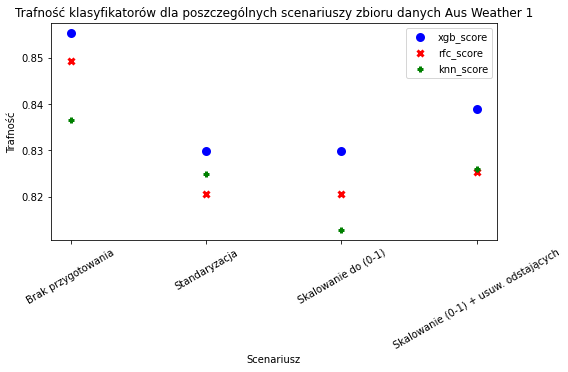

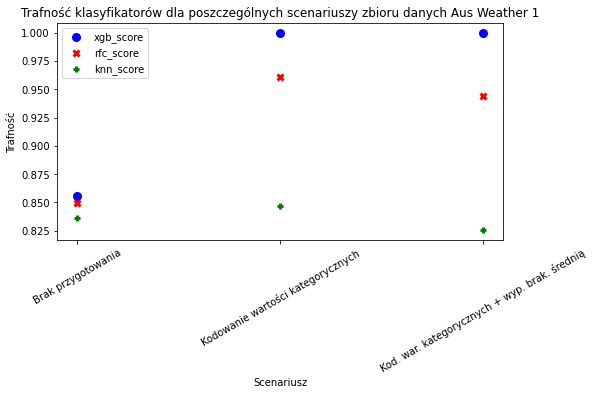

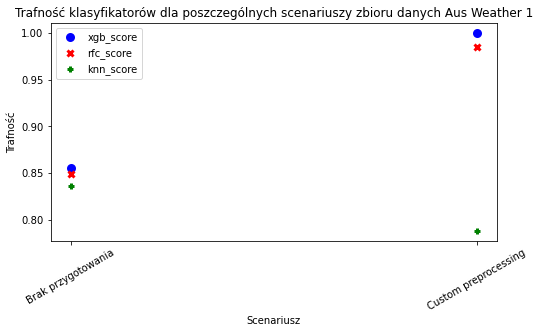

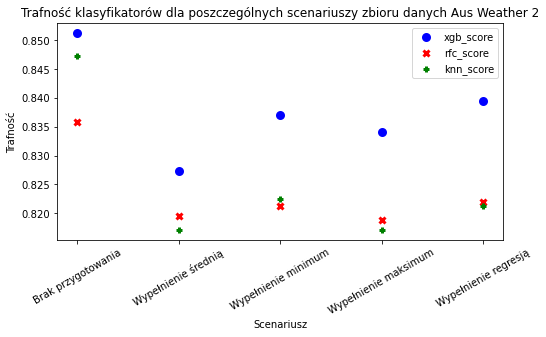

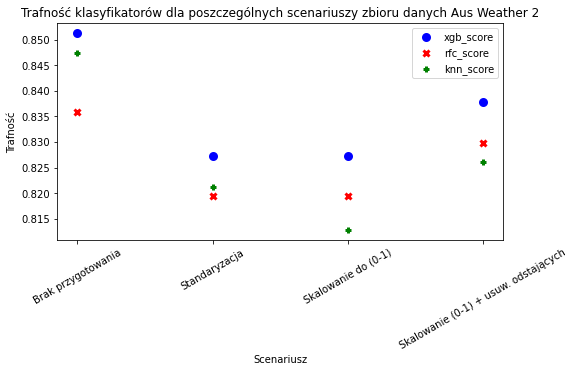

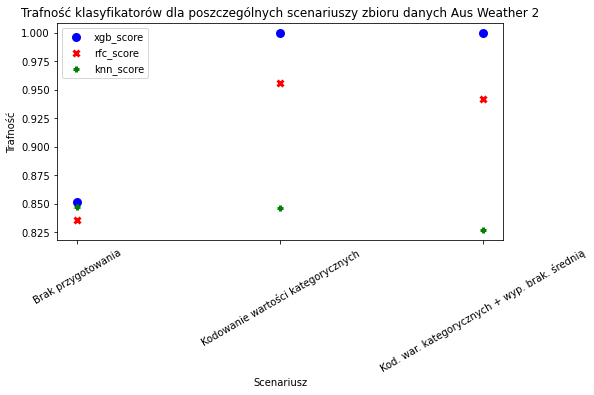

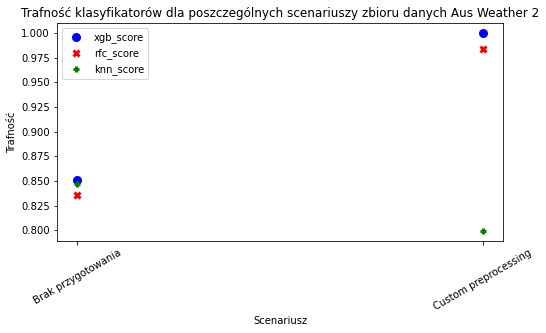

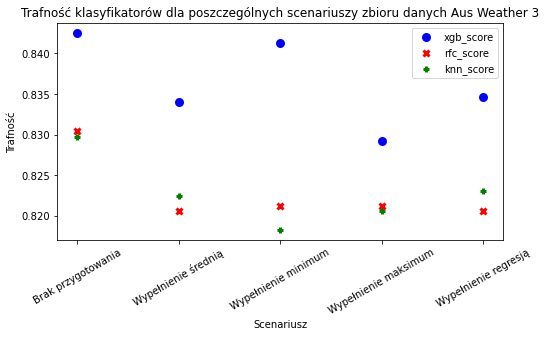

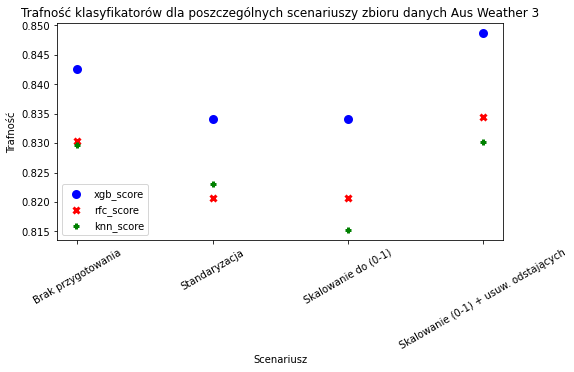

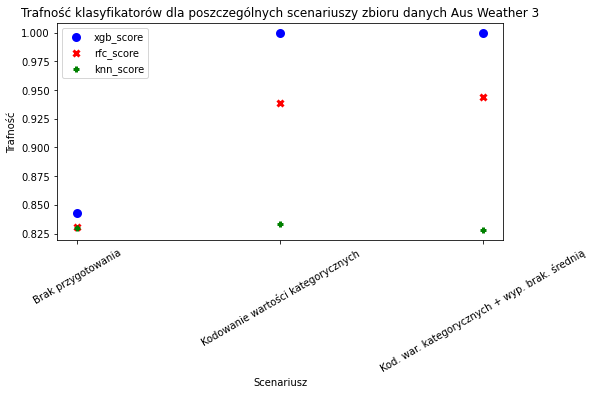

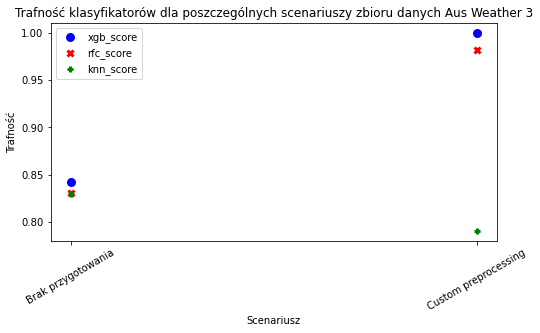

In [41]:
i = 1 
for dataset in [aus_weather_1,aus_weather_2,aus_weather_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Aus Weather " + str(i) ,
                                 "Aus_Weather_" + str(i) + "_" + group)
    i = i + 1


C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

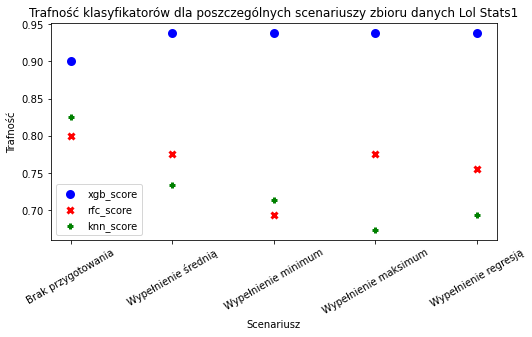

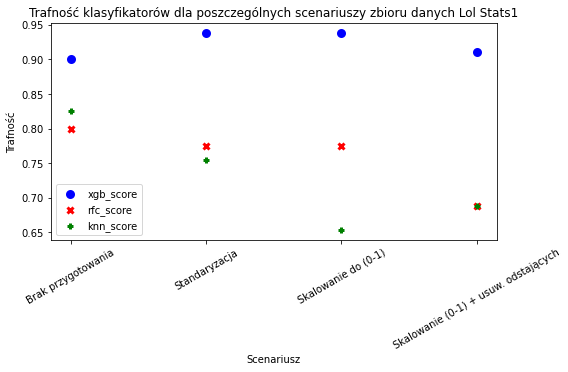

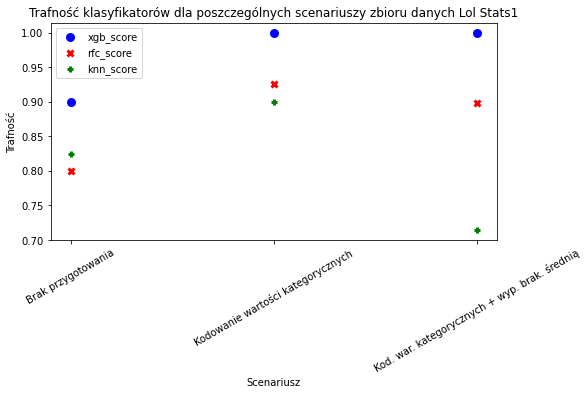

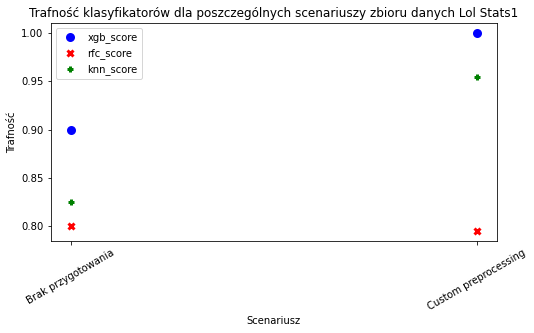

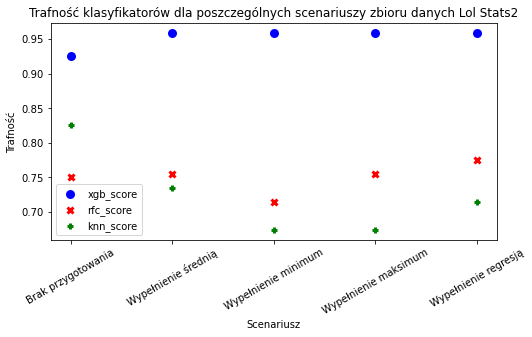

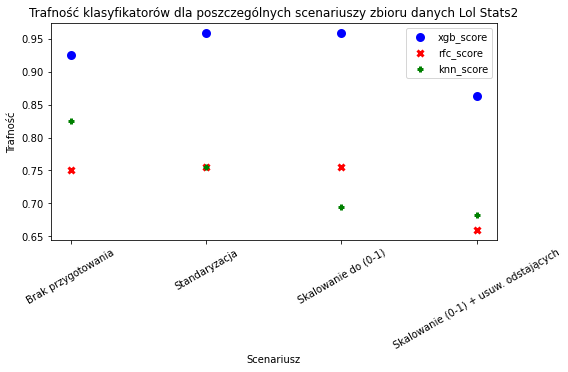

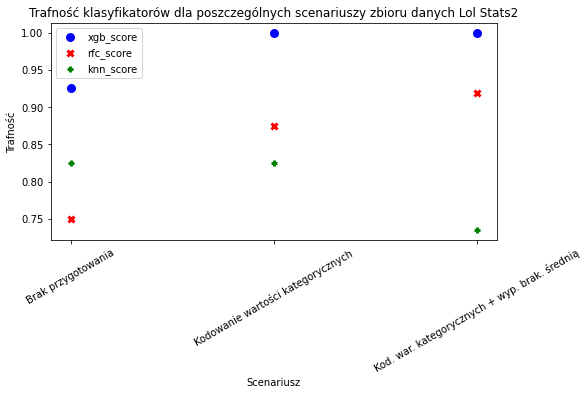

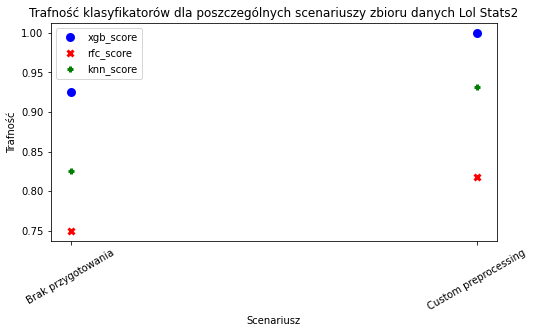

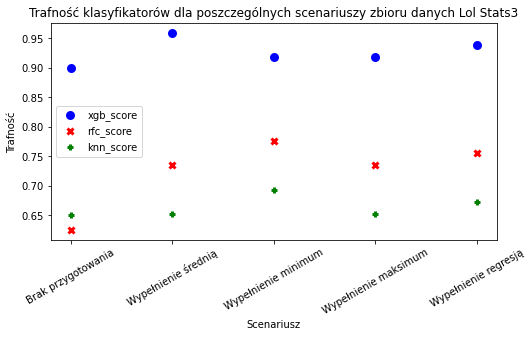

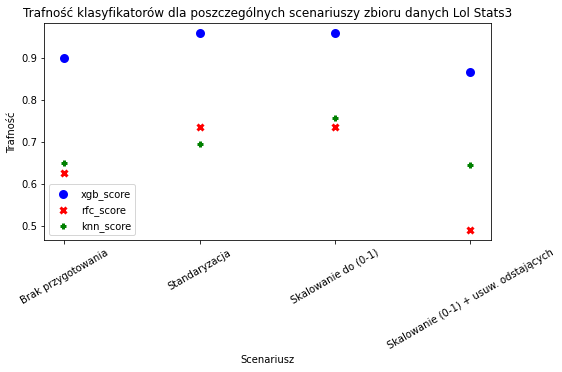

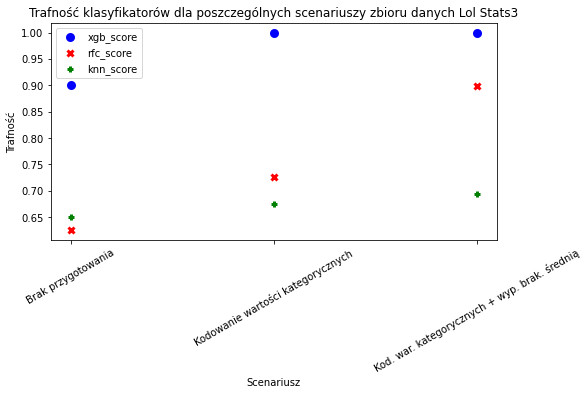

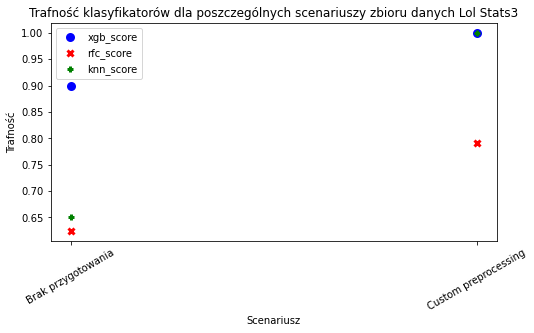

In [42]:
i = 1 
for dataset in [lol_stats_1,lol_stats_2,lol_stats_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Lol Stats" + str(i),
                                 "Lol_Stats_" + str(i) + "_" + group)
    i = i + 1


C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

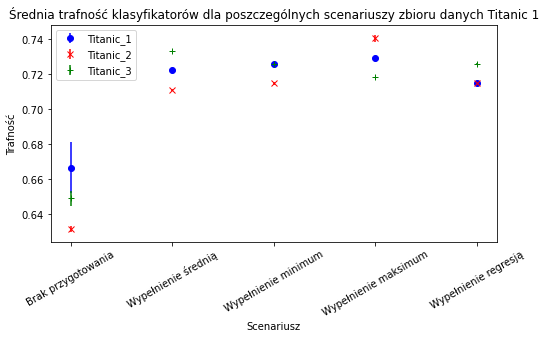

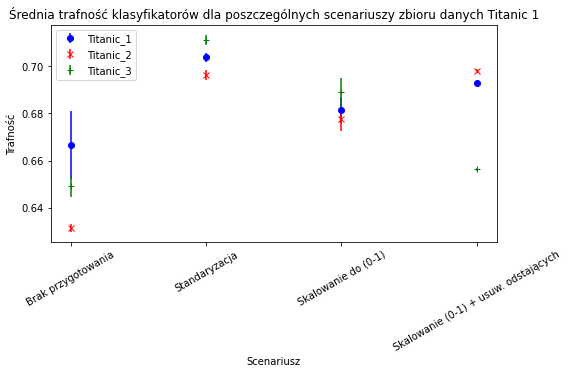

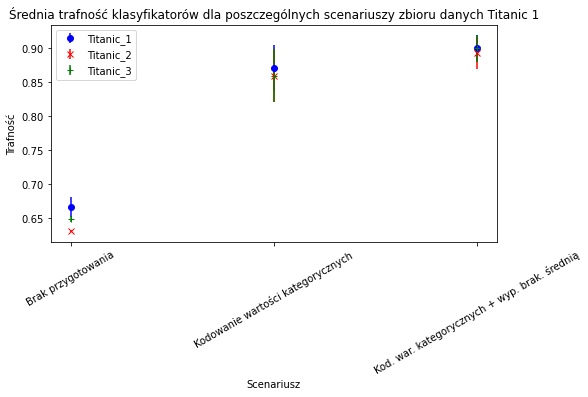

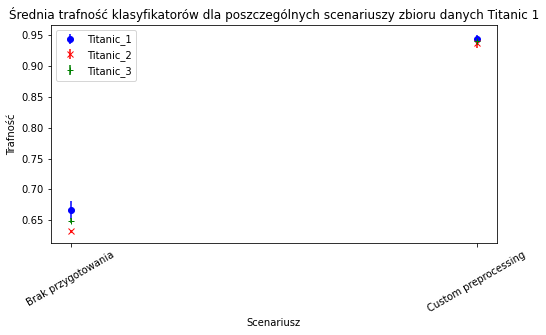

In [43]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(titanic_1,group),
               get_group_results(titanic_2,group),
               get_group_results(titanic_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Titanic 1",
               "Titanic_Avg_"+group)

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

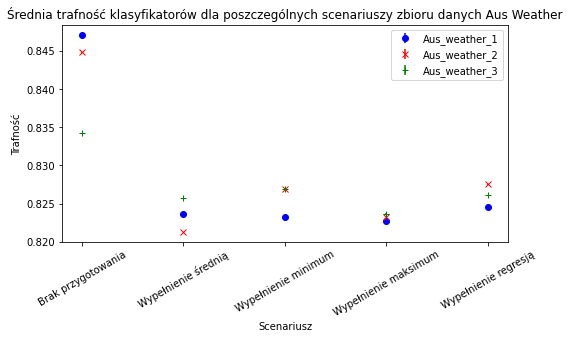

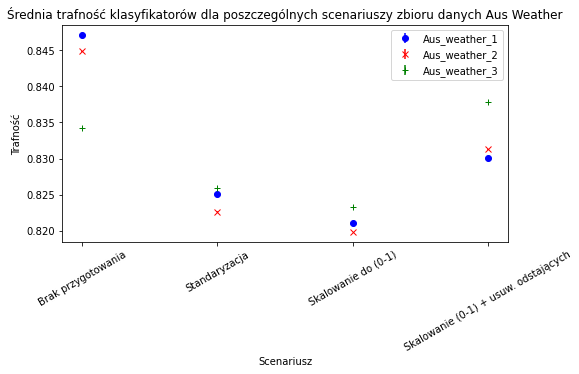

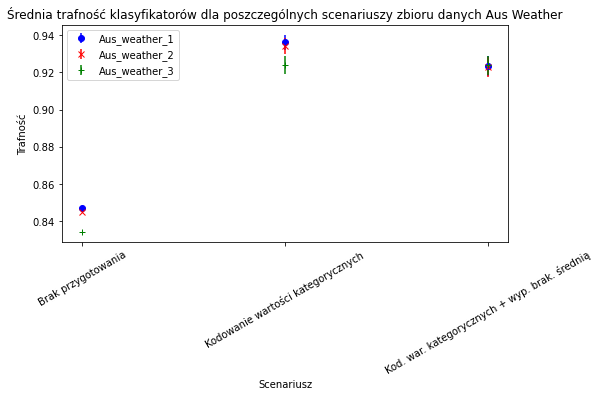

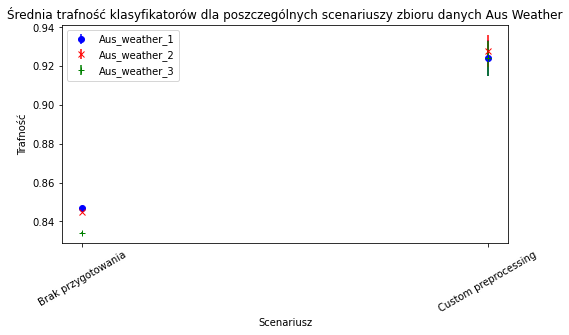

In [44]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(aus_weather_1,group),
               get_group_results(aus_weather_2,group),
               get_group_results(aus_weather_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Aus Weather",
               "Aus_Weather_Avg_"+group)

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

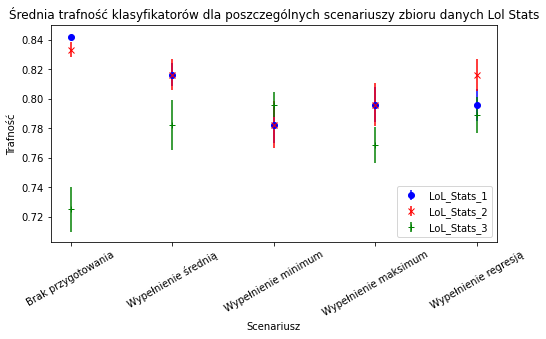

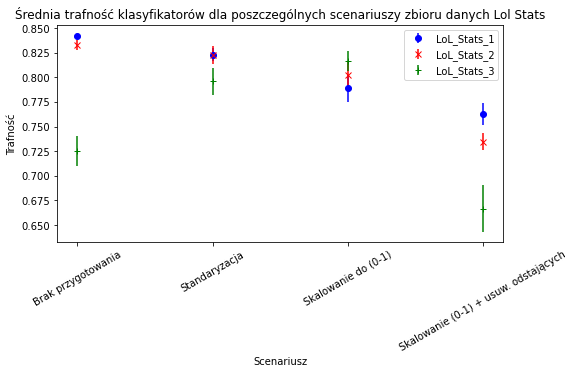

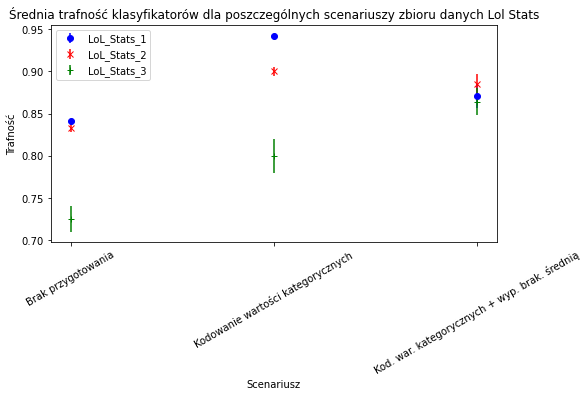

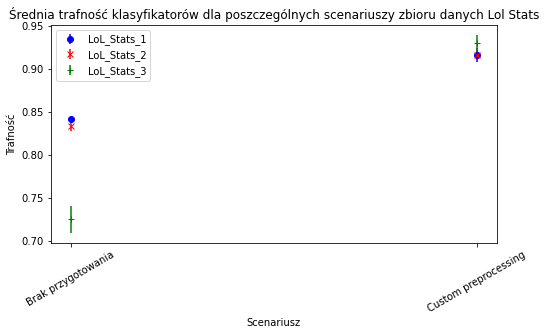

In [45]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(lol_stats_1,group),
               get_group_results(lol_stats_2,group),
               get_group_results(lol_stats_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Lol Stats",
               "Lol_Stats_Avg_"+group)

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

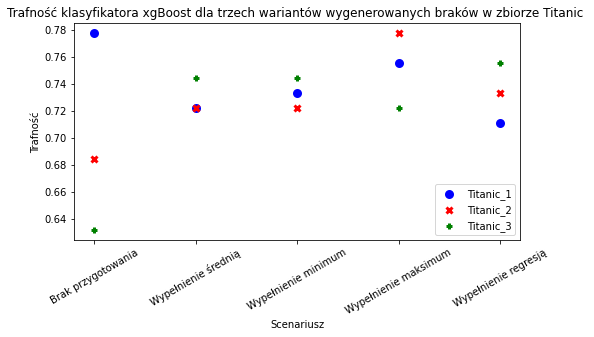

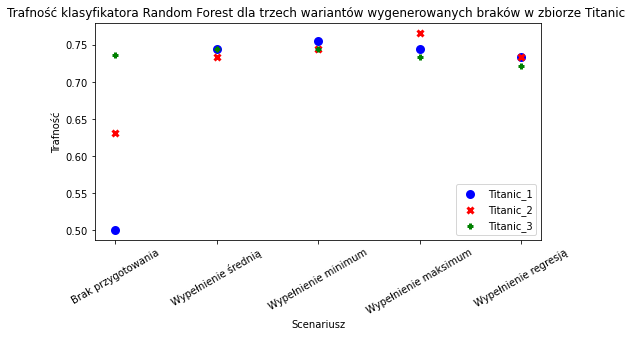

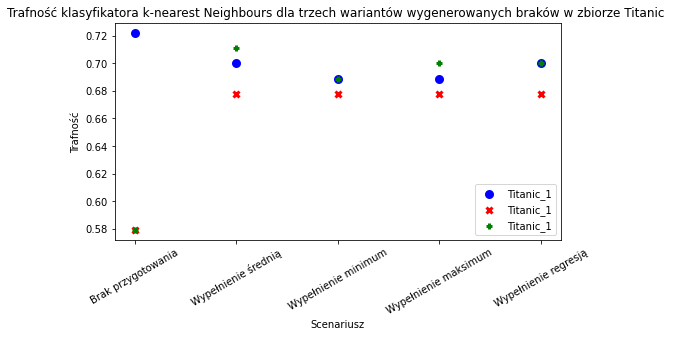

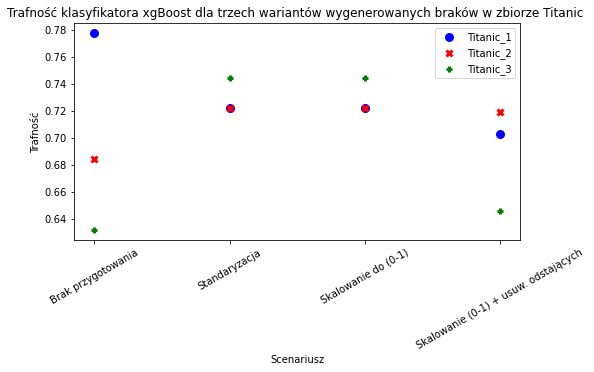

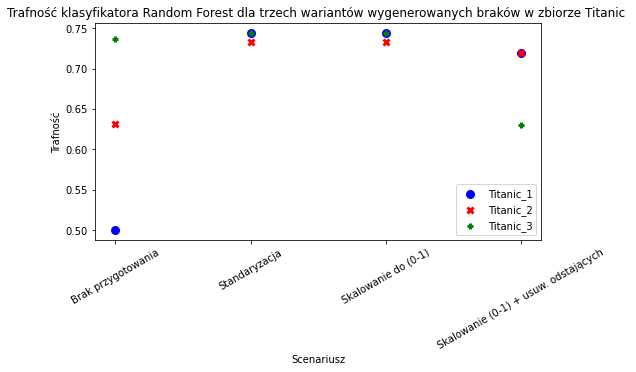

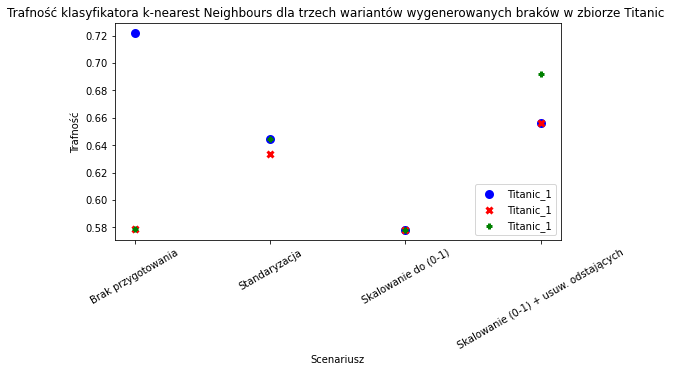

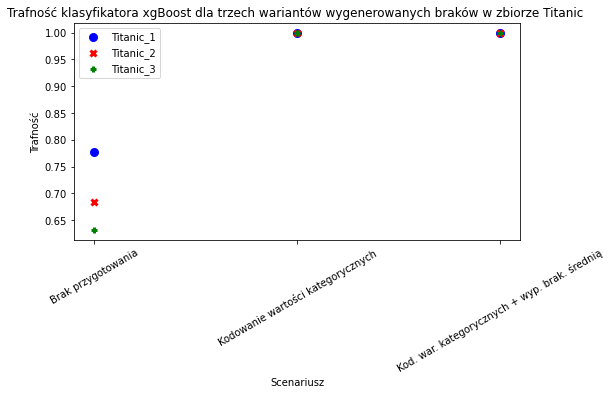

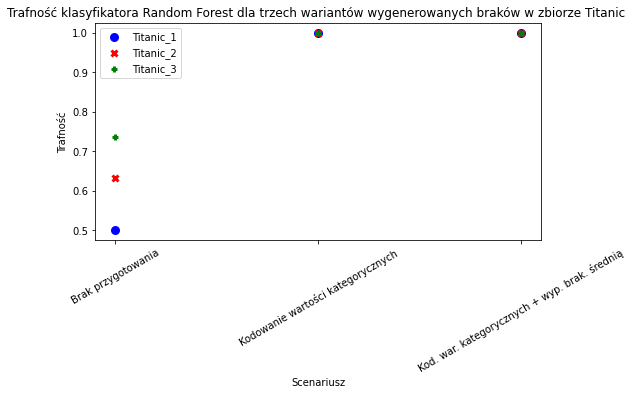

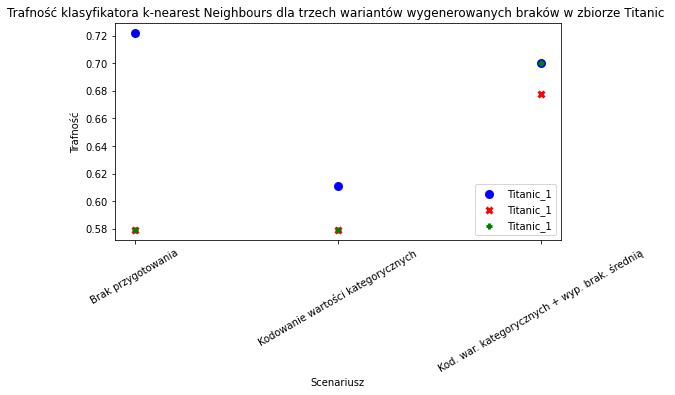

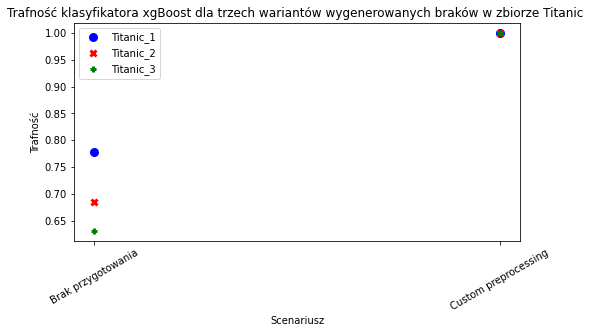

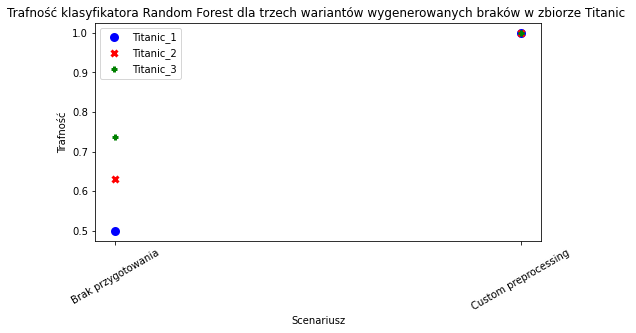

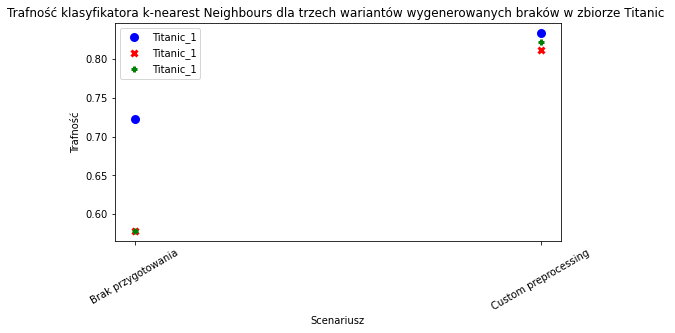

In [46]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_xgb_" + group)
        plot_rfc_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_rfc_" + group)
        plot_knn_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_knn_" + group)

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

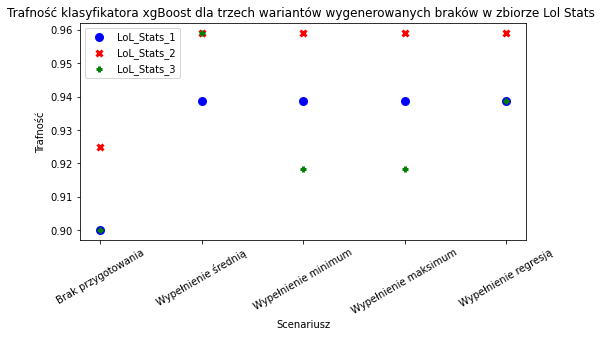

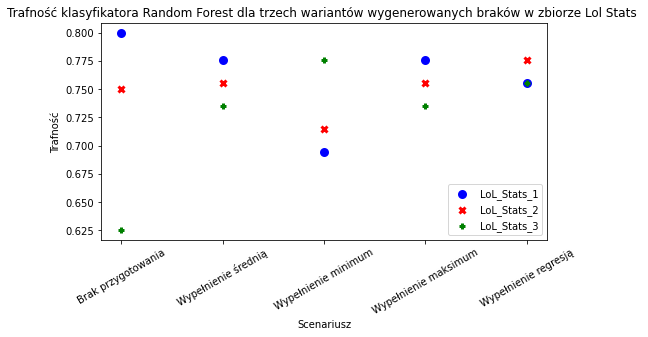

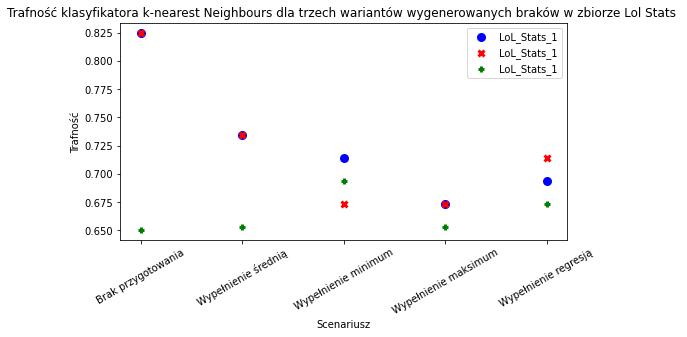

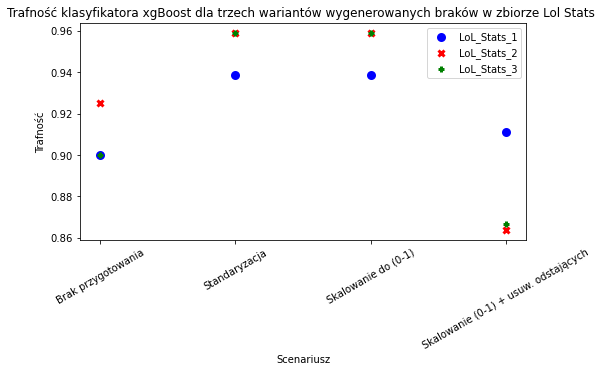

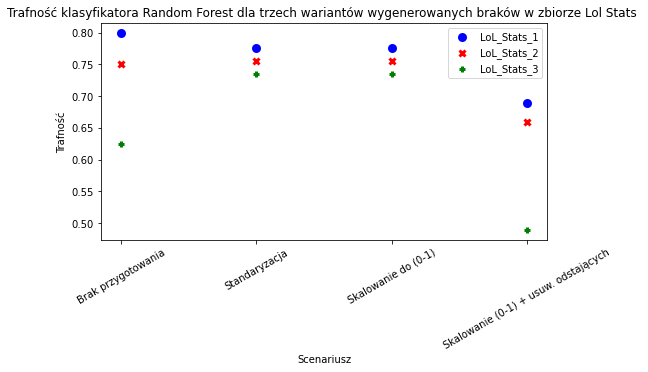

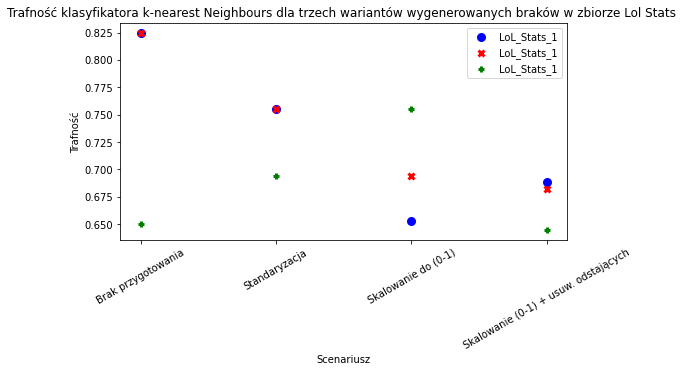

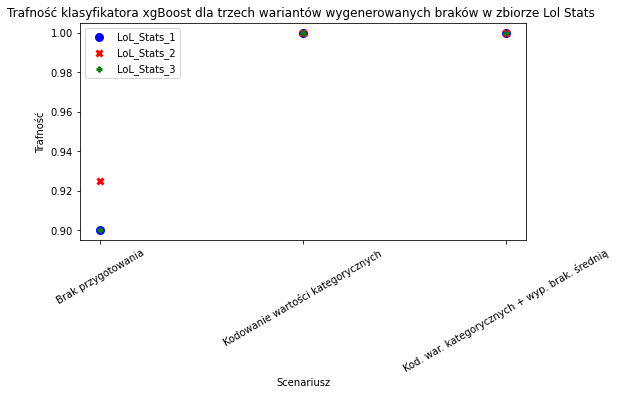

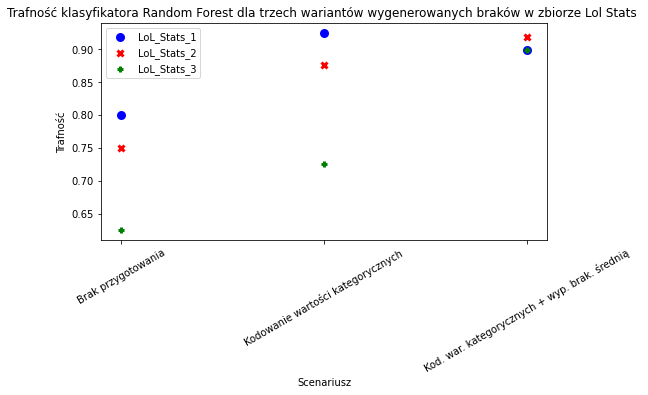

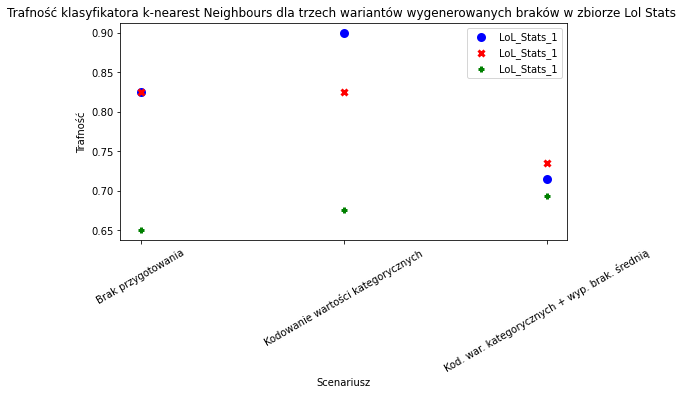

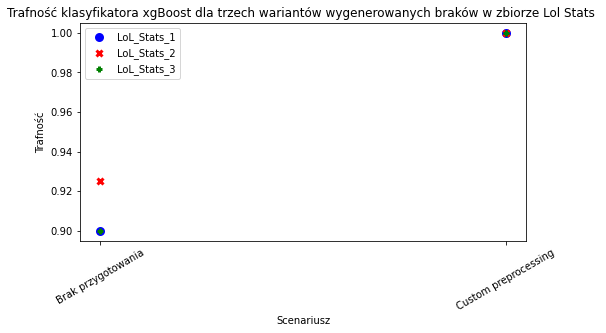

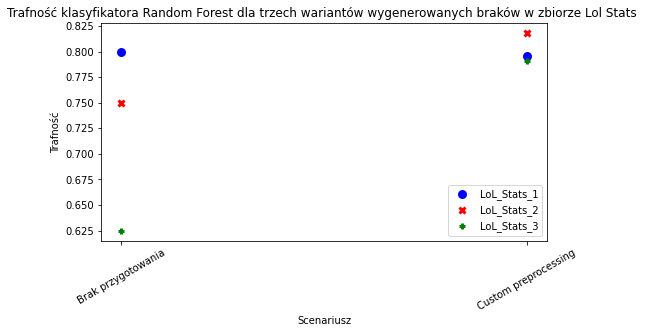

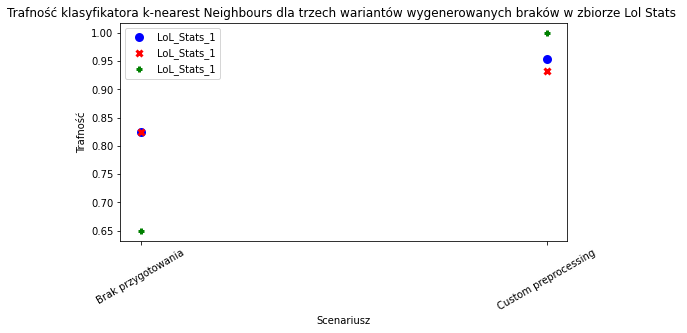

In [47]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_xgb_" + group)
        plot_rfc_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_rfc_" + group)
        plot_knn_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_knn_" + group)

C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_res = data_res.append(dataset.loc[dataset['group'] == group])
C:\Users\Darek\AppData\Local\Temp\ipykernel_18528\741559520.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

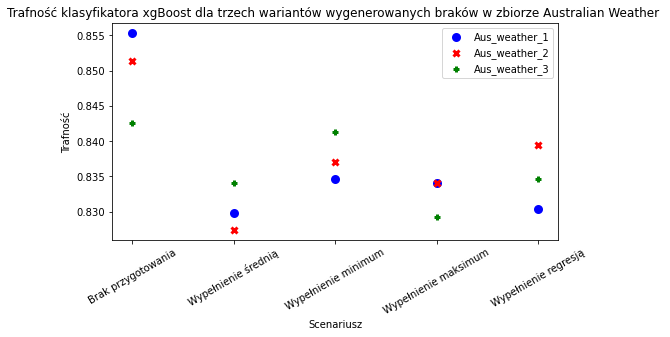

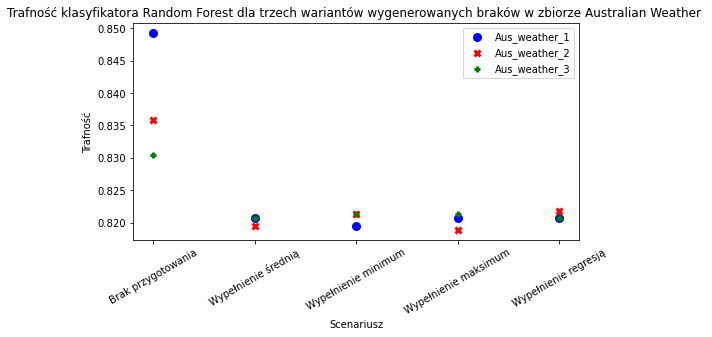

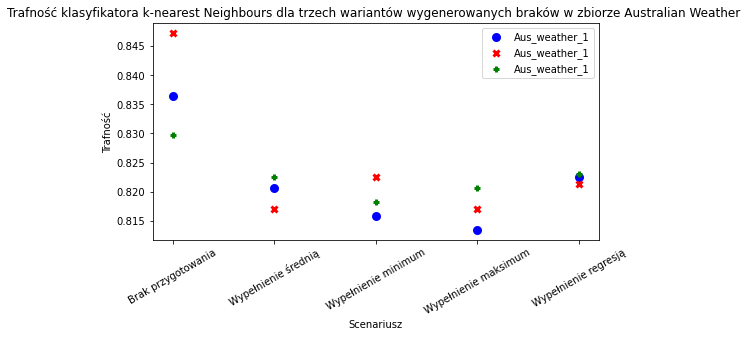

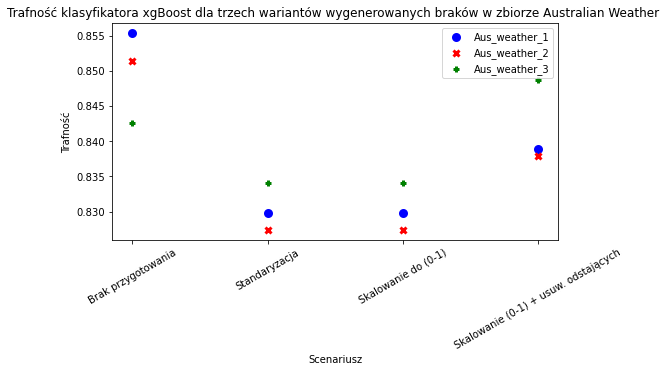

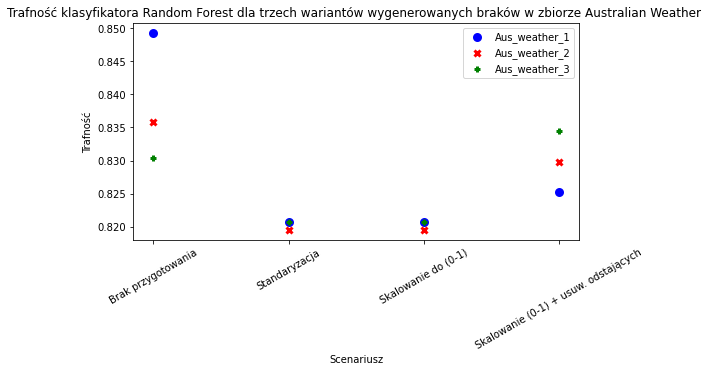

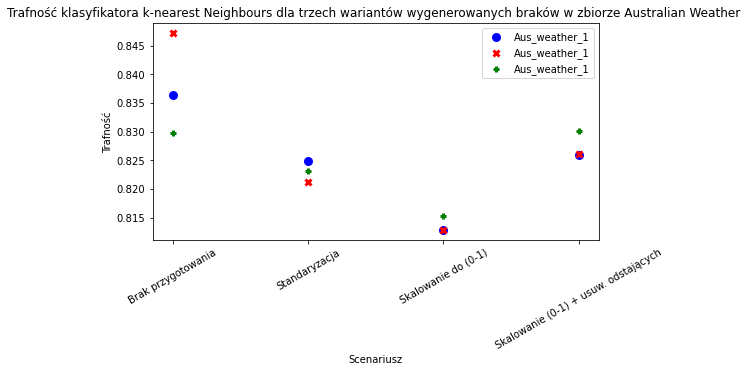

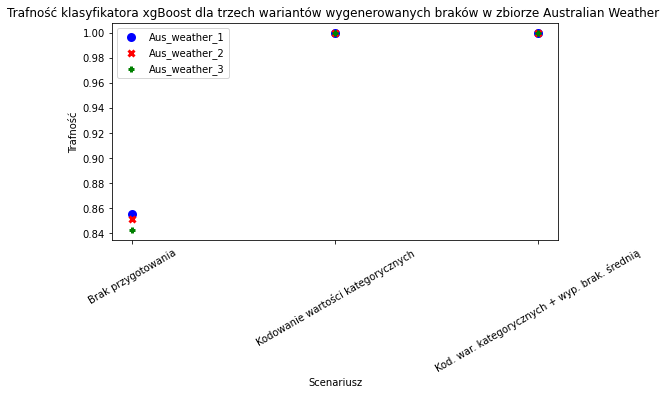

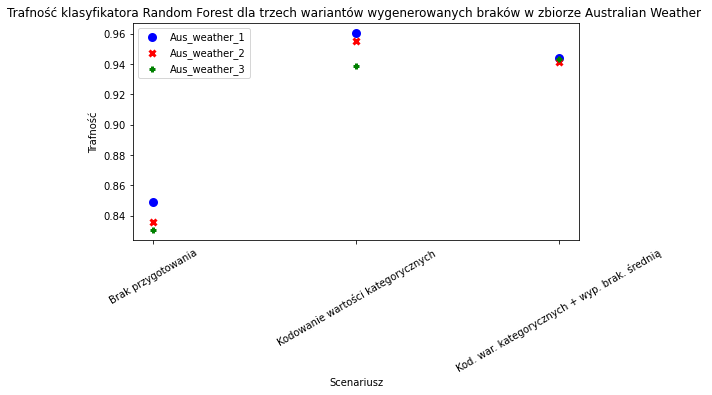

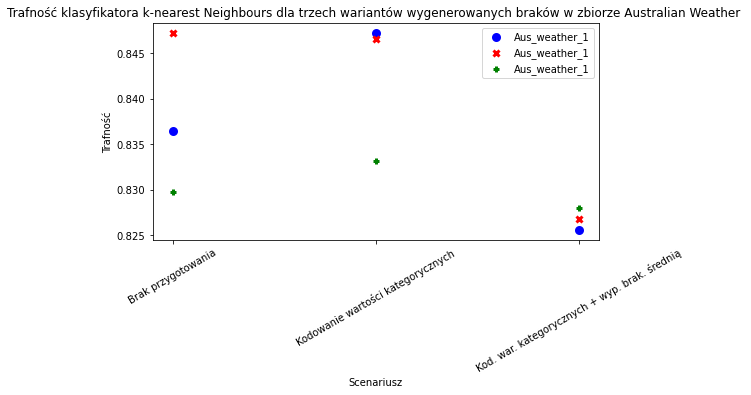

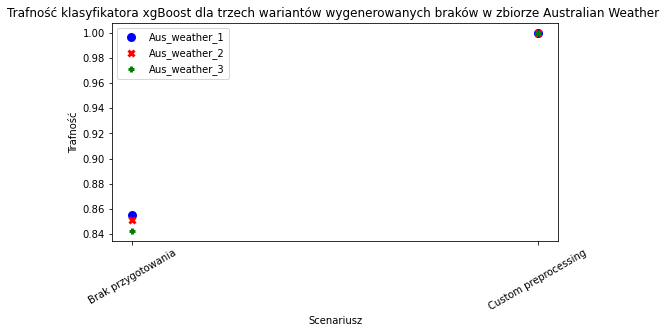

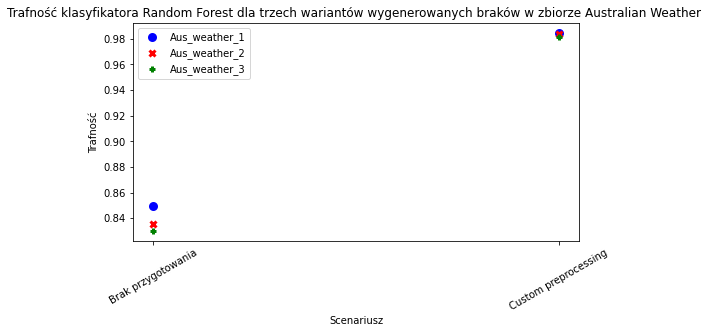

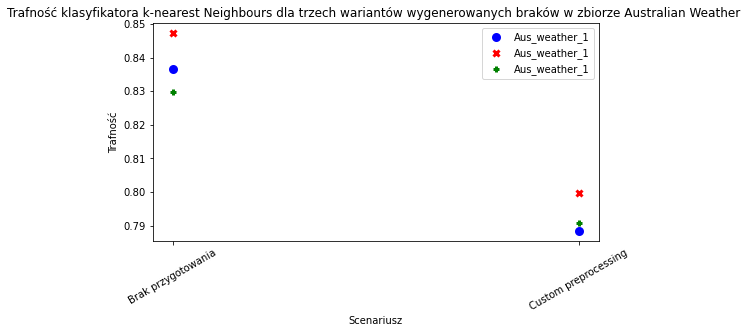

In [48]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_xgb_" + group)
        plot_rfc_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_rfc_" + group)
        plot_knn_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_knn_" + group)